# EDA on Haberman Survival Dataset

Haberman's Suvival Dataset:
Reference :
https://www.kaggle.com/gilsousa/habermans-survival-data-set

https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival

## Informations about dataset :

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### Attribute Information :

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) -- 1 = the patient survived 5 years or longer -- 2 = the patient died within 5 year

### Objective :

To predict Whether a patient will survive 5 years or more after the operation based on age , year of operation and the number of positive axillary nodes.

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv("F:\Assignment\csv\haberman.csv")
#reading csv file
print(data.shape)
#there is 306 rows and 4 columns in this dataset
print(data.columns)
print(data["status"].value_counts())
#this is highly imbalanced dataset



# 2D Scatter plot


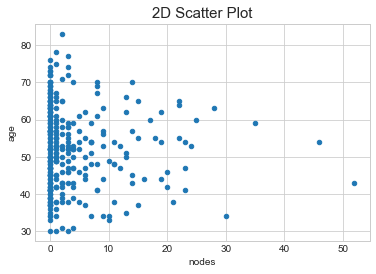

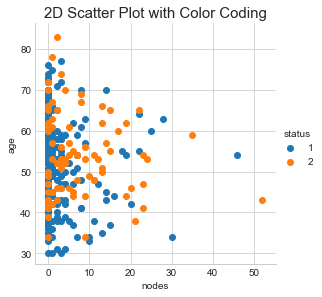

In [28]:
data.plot(kind='scatter', x='nodes', y='age') ;
plt.title("2D Scatter Plot",size=15)
plt.show()#this makes no sense about what points are nodes and age
sns.set_style("whitegrid")#plotting using seaborn
sns.FacetGrid(data,hue="status",size=4)\
   .map(plt.scatter, "nodes", "age") \
   .add_legend();
plt.title("2D Scatter Plot with Color Coding",size=15)
plt.show()
#here blue dot represnt survival more than 5 years and orange dot represent survival less than 5 years

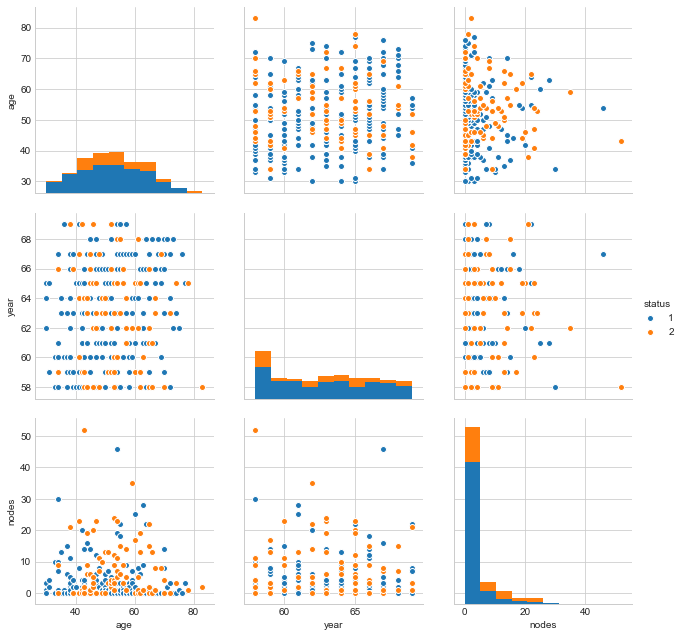

In [34]:
plt.close();
sns.set_style("whitegrid")
sns.pairplot(data, hue="status", size=3,vars=["age","year","nodes"])
plt.show()
#this gives the combination plot of data, these types of plot are called pairplot
#plot 1,5,9 are histogram of features
#we will consider only that plot which can help to distinguish between the features
#here we can see that plot 3 and plot 7 gives distinguishable features so I can select these plot for further analysis

# Now I can do 1D plot


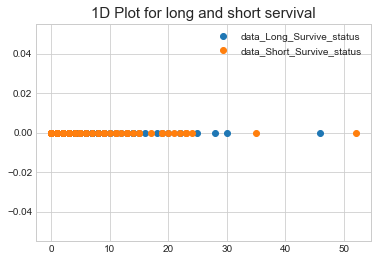

In [25]:
#1D plot used only one feature at a time
import numpy as np
data_Long_Survive = data.loc[data["status"] == 1]
data_Short_Survive = data.loc[data["status"] == 2]
plt.plot(data_Long_Survive["nodes"], np.zeros_like(data_Long_Survive['nodes']), 'o')
plt.plot(data_Short_Survive["nodes"], np.zeros_like(data_Short_Survive['nodes']), 'o')
plt.title("1D Plot for long and short servival",size=15)
plt.legend(["data_Long_Survive_status","data_Short_Survive_status"])
plt.show()
#Here I can see that data_short_survival are mostly overlap to data_long_Survival.so from this plot I conclude anything.

# Now we will plot PDF of features

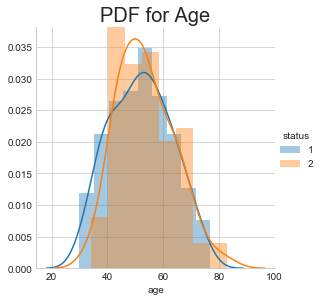

In [27]:
#pdf of age
sns.FacetGrid(data,hue='status',size=4)\
   .map(sns.distplot, 'age') \
   .add_legend();
plt.title("PDF for Age",size=20)
plt.show()
#In above plot it is observed that at the age range from 30–75 the status of survival and death is same.
#So, using this datapoint we cannot predict anything

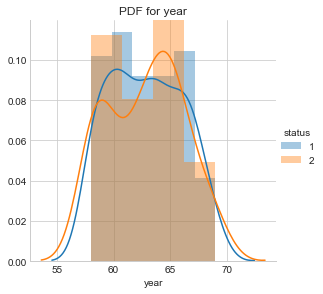

In [14]:
#PDF of year
sns.FacetGrid(data,hue="status",size=4)\
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("PDF for year")
plt.show()
#PDF of each point are collapse at each other so we can't conclude anything.


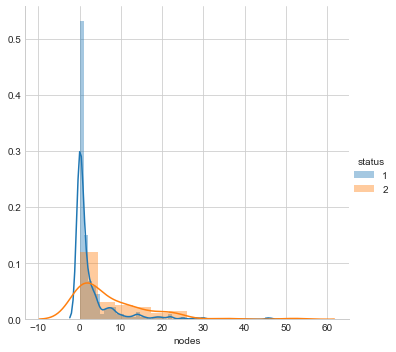

'"if(nodes≤0)\nPatient= Long survival\nelse if(nodes≥0 && nodes≤3.5(approx))\nPatient= Long survival chances are high\nelse if(nodes ≥3.5)\nPatient = Short survival'

In [15]:
#PDF of nodes
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();
#It has been observed that people survive long if they have less 
#nodes detected and vice versa but still it is hard to classify but
#this is the best data we can choose among all. So, I accept the PDF of  nodes and can conclude below result
""""if(nodes≤0)
Patient= Long survival
else if(nodes≥0 && nodes≤3.5(approx))
Patient= Long survival chances are high
else if(nodes ≥3.5)
Patient = Short survival"""

So from above observation we can say about patienr survival status but we can't tell about what percentage of patient can survive .
So we need CDF of nodes fearture

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


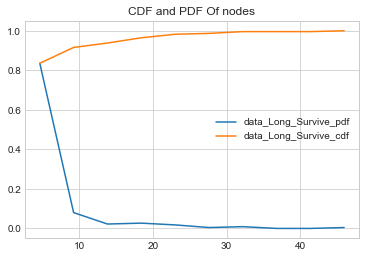

In [17]:
#CDF of nodes
counts, bin_edges = np.histogram(data_Long_Survive['nodes'], bins=10, 
 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.title("CDF and PDF Of nodes")
plt.plot(bin_edges[1:], cdf)
plt.legend(["data_Long_Survive_pdf","data_Long_Survive_cdf"])
plt.show()

From above CDF I can observe that orange line shows there is a 85% chance of long survival if number of  nodes detected are < 5. Also we can see as number of nodes increases survival chances also reduces means it is clearly observed that 80% — 85% of people have good chances of survival if they have less no of auxillary nodes detected and as nodes increases the survival status also decreases as a result 100% of people have less chances of survival if nodes increases >40
Let’s try to plot CDF for both feature in a single plot.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


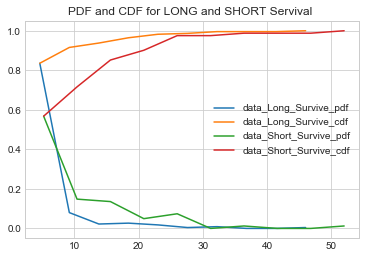

In [18]:
#CDF of nodes
counts, bin_edges = np.histogram(data_Long_Survive['nodes'], bins=10, 
 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
counts, bin_edges = np.histogram(data_Short_Survive['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['data_Long_Survive_pdf', 'data_Long_Survive_cdf','data_Short_Survive_pdf', 'data_Short_Survive_cdf'])
plt.title("PDF and CDF for LONG and SHORT Servival ")
plt.show();

Here we can observe in above combine CDF for Long survival observation is same but in Short survival nearly 55% of people who have nodes less than 5 and there are nearly 100% of people in short survival if nodes are > 40

# Calculate mean and standard deviation


In [19]:
print('Means:')
print (np.mean(data_Long_Survive['nodes']))
print (np.mean(data_Short_Survive['nodes']))
print('\nStandard Deviation:')
print(np.std(data_Long_Survive["nodes"]))
print(np.std(data_Short_Survive["nodes"]))

Means:
2.7911111111111113
7.45679012345679

Standard Deviation:
5.857258449412131
9.128776076761632


Here we can see that data_long_survive has less std than data_short_survive.So data_short_survive is more spreaded.

# Median,Quantiles,Percentile

In [20]:
print("Medians:")
print(np.median(data_Long_Survive["nodes"]))
print(np.median(data_Short_Survive["nodes"]))
print("\nQuantiles:")
print(np.percentile(data_Long_Survive["nodes"],np.arange(0,100,25)))
print(np.percentile(data_Short_Survive["nodes"],np.arange(0,100,25)))
print("\n90th percentile:")
print(np.percentile(data_Long_Survive["nodes"],90))
print(np.percentile(data_Short_Survive["nodes"],90))
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(data_Long_Survive["nodes"]))
print(robust.mad(data_Short_Survive["nodes"]))

Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th percentile:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


# Boxplot and whiskers

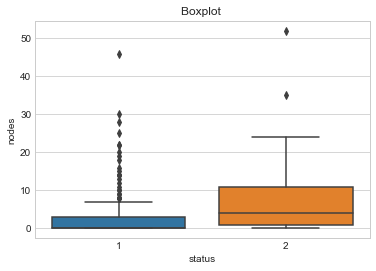

In [21]:
sns.boxplot(x="status",y="nodes", data=data)
plt.title("Boxplot ")
plt.show()

In above box whiskers 25th percentile and 50th percentile are nearly same for Long survive and threshold for it is 0 to 7. Also, for short survival there are 50th percentile of nodes are nearly same as long survive 75th percentile. Threshold for the Short survival us 0 to 25 nodes and 75th% is 12 and 25th% is 1 or 2
So,if nodes between 0–7 have chances of error as short survival plot is also lies in it. That is 50% error for Short survival status
There are most of point above 12 lies in Short survival.

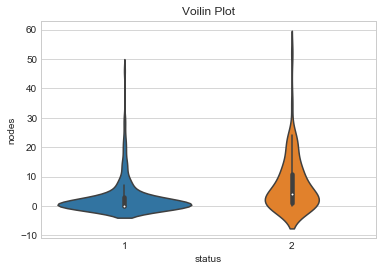

In [22]:
#VOILIN PLOT
sns.violinplot(x="status", y="nodes",data=data)
plt.legend
plt.title("Voilin Plot")
plt.show()

In above violin plot we observe that For long survive density for it is more near the 0 nodes and also it has whiskers in range o-7 and in violin 2 it shows the short survival density more from 0–20 ans threshold from 0–12

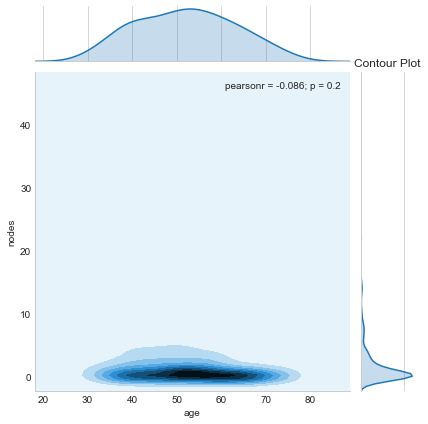

In [23]:
#CONTOUR PLOT
sns.jointplot(x="age",y="nodes",data=data_Long_Survive,kind="kde")
plt.grid()
plt.title("Contour Plot")
plt.show()

Above is the 2D density plot for long survival using feature age and axillary nodes, it is observed the density of point for long survival is more from age range 47–60 and axillary nodes from 0–3. The dark area have major density which is hill top in 3D and density is getting low as graph get lighter. Each shade represent 1 contour plot.

# Conclusion

1) Patient's age and Year of operation alone are not deciding factors for his/her survival.

2)As the number of positive  nodes increase the chance of survival of patient decrease at the same time having zero postivie  nodes doesn't guarentee survival as there are cases where patients with zero positive nodes couldn't survive 5 years from the time of operation.

3) Even if we could come up with a simple model which could predict the survival of a patient based on the insights we got , the chance of misclassification is high.
